In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load datasets and merge on by ID
survey_data = pd.read_csv('data/CSAT_Survey_Data.csv')
age_data = pd.read_csv('data/Customer_Age_Data.csv')
mrr_data = pd.read_csv('data/Customer_MRR_Data.csv')
revenue_data = pd.read_csv('data/Customer_Revenue_Data.csv')
ticket_data = pd.read_csv('data/Help_Ticket_Data.csv')
interaction_data = pd.read_csv('data/Newsletter_Interaction_Data.csv')
bugtask_data = pd.read_csv('data/Product_Bug_Task_Data.csv')
region_data = pd.read_csv('data/RegionAndVertical_Data.csv')
status_data = pd.read_csv('data/StatusAndLevel_Data.csv')

# change column name on age data
age_data.rename(columns={'CRM ID':'Customer ID','Customer Age (Months)':'Age'}, inplace=True)

survey_data["order"] = survey_data.groupby("Customer ID").cumcount()
bugtask_data["order"] = bugtask_data.groupby("Customer ID").cumcount()

# merge all datasets
df = pd.merge(survey_data, age_data, on='Customer ID', how='outer')
print(df.shape)
df = pd.merge(df, mrr_data, on='Customer ID', how='outer')
print(df.shape)
df = pd.merge(df, revenue_data, on='Customer ID', how='outer')
df = pd.merge(df, ticket_data, on='Customer ID', how='outer')
print(df.shape)
df = pd.merge(df, interaction_data, on='Customer ID', how='outer')
print(df.shape)
df = pd.merge(df, bugtask_data, on=["Customer ID", "order"], how='outer')
print(df.shape)
df = pd.merge(df, region_data, on='Customer ID', how='outer')
print(df.shape)
df = pd.merge(df, status_data, on='Customer ID', how='outer')
print(df.shape)

# change dates to datetime
df["Survey Date"] = pd.to_datetime(df["Survey Date"])
df["Response Date"] = pd.to_datetime(df["Response Date"])
df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)

# split CRM- from the customer id
# df['Customer ID'] = df['Customer ID'].apply(lambda x: x.split('CRM-')[1])

df.drop(columns=['Year'], inplace=True)

df.head()

(4002, 13)
(4050, 14)
(4050, 17)
(4050, 18)
(4050, 19)
(4054, 22)
(4066, 24)


,Customer ID,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,...,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1002400,2.0,2022-04-01,2022-06-10,8.0,4.0,Once a Month,4.0,3.0,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
1,CRM-1002400,3.0,2022-07-01,2022-09-29,10.0,4.0,Once a Month,3.0,3.0,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,72.0,CEE,Retail,Cosmetics,Retained,Enterprise
2,CRM-1002400,1.0,2022-01-01,2022-03-01,9.0,4.0,Once a Month,4.0,NaN,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,160.0,CEE,Retail,Cosmetics,Retained,Enterprise
3,CRM-1002400,1.0,2022-01-01,2022-03-21,9.0,4.0,Once a Month,4.0,NaN,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,159.0,CEE,Retail,Cosmetics,Retained,Enterprise
4,CRM-1005900,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,"$2,690,946",4.0,2709.0,NaN,NaN,Korea,Retail,Consumer Electronics,Retained,Enterprise


In [3]:
df.columns

Index(['Customer ID', 'Quarter', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel',
       'order', 'Age', 'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level'],
      dtype='object')

In [4]:
survey_data["order"] = survey_data.groupby("Customer ID").cumcount()
bugtask_data["order"] = bugtask_data.groupby("Customer ID").cumcount()

# Şimdi, hem "Customer ID" hem de "order" sütunlarına göre merge işlemini yapalım.
merged_df = pd.merge(survey_data, bugtask_data, on=["Customer ID", "order"], how="inner")

# Sonuçları gözlemleyelim
merged_df.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,order,Product Bug Task Count
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...,0,109
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often,1,112
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,0,160
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need,1,191
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...,2,119


In [5]:
df.columns

Index(['Customer ID', 'Quarter', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel',
       'order', 'Age', 'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level'],
      dtype='object')

In [6]:
# analyze data
print(df.shape)
print(df.info())
print(df.describe())


(4066, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4066 entries, 0 to 4065
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Customer ID                                                                4050 non-null   object        
 1   Quarter                                                                    1989 non-null   float64       
 2   Survey Date                                                                1989 non-null   datetime64[ns]
 3   Response Date                                                              1989 non-null   datetime64[ns]
 4   How likely are you to recommend insider to a friend or colleague           1989 non-null   float64       
 5   How would you rate the value you gain from our company                     1989 non-null   float64  

In [7]:
df.head()

,Customer ID,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,...,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1002400,2.0,2022-04-01,2022-06-10,8.0,4.0,Once a Month,4.0,3.0,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,175.0,CEE,Retail,Cosmetics,Retained,Enterprise
1,CRM-1002400,3.0,2022-07-01,2022-09-29,10.0,4.0,Once a Month,3.0,3.0,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,72.0,CEE,Retail,Cosmetics,Retained,Enterprise
2,CRM-1002400,1.0,2022-01-01,2022-03-01,9.0,4.0,Once a Month,4.0,NaN,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,160.0,CEE,Retail,Cosmetics,Retained,Enterprise
3,CRM-1002400,1.0,2022-01-01,2022-03-21,9.0,4.0,Once a Month,4.0,NaN,I need someone from Insider team to provide me...,...,"$279,868",55.0,701.0,NaN,159.0,CEE,Retail,Cosmetics,Retained,Enterprise
4,CRM-1005900,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,"$2,690,946",4.0,2709.0,NaN,NaN,Korea,Retail,Consumer Electronics,Retained,Enterprise


In [8]:
df.columns

Index(['Customer ID', 'Quarter', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel',
       'order', 'Age', 'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level'],
      dtype='object')

In [9]:
# find null values
print(df.isnull().sum())

# drop null values
df_no_null = df.dropna(inplace=False)

Customer ID                                                                    16
Quarter                                                                      2077
Survey Date                                                                  2077
Response Date                                                                2077
How likely are you to recommend insider to a friend or colleague             2077
How would you rate the value you gain from our company                       2077
How frequently are you using our platform                                    2080
Please rate the overall quality of our products                              2077
Please rate the usability of the panel                                       2141
Please rate your understanding of our reporting capabilities in the panel    2077
order                                                                        2077
Age                                                                            68
MRR             

In [10]:
df.rename(columns={'How likely are you to recommend insider to a friend or colleague ': 'Recommendation',
                   'How would you rate the value you gain from our company': 'Gain Rating',
                   'Please rate the overall quality of our products': 'Product Quality Rating',
                   'Please rate the usability of the panel': 'Panel Usability Rating',
                   'Please rate your understanding of our reporting capabilities in the panel': 'Report Understanding',
                    'How frequently are you using our platform': 'Use Frequent',
                    'Company Newsletter Interaction Count':'Newsletter Int Count',
                    'Help Ticket Lead Time (hours)':'Help time'}, inplace=True)
# get numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.describe()


,Quarter,Recommendation,Gain Rating,Product Quality Rating,Panel Usability Rating,order,Age,Help Ticket Count,Help time,Newsletter Int Count,Product Bug Task Count
count,1989.000000,1989.000000,1989.00000,1989.000000,1925.000000,1989.000000,3998.000000,2614.000000,2614.000000,588.000000,1989.000000
mean,2.088487,8.301156,4.27099,4.123680,4.036364,1.635495,25.345673,24.638103,774.680566,4.855442,141.328306
std,0.832086,1.634729,0.77269,0.821484,0.837484,1.722840,18.553605,34.310471,582.050129,6.389769,40.094410
min,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.000000
25%,1.000000,8.000000,4.00000,4.000000,4.000000,0.000000,12.000000,5.000000,418.000000,2.000000,113.000000
50%,2.000000,8.000000,4.00000,4.000000,4.000000,1.000000,22.000000,13.000000,627.500000,3.000000,150.000000
75%,3.000000,10.000000,5.00000,5.000000,5.000000,3.000000,35.750000,32.000000,965.000000,5.000000,174.000000
max,3.000000,10.000000,5.00000,5.000000,5.000000,11.000000,72.000000,443.000000,11632.000000,54.000000,200.000000


In [11]:
print(df_num.shape)

(4066, 11)


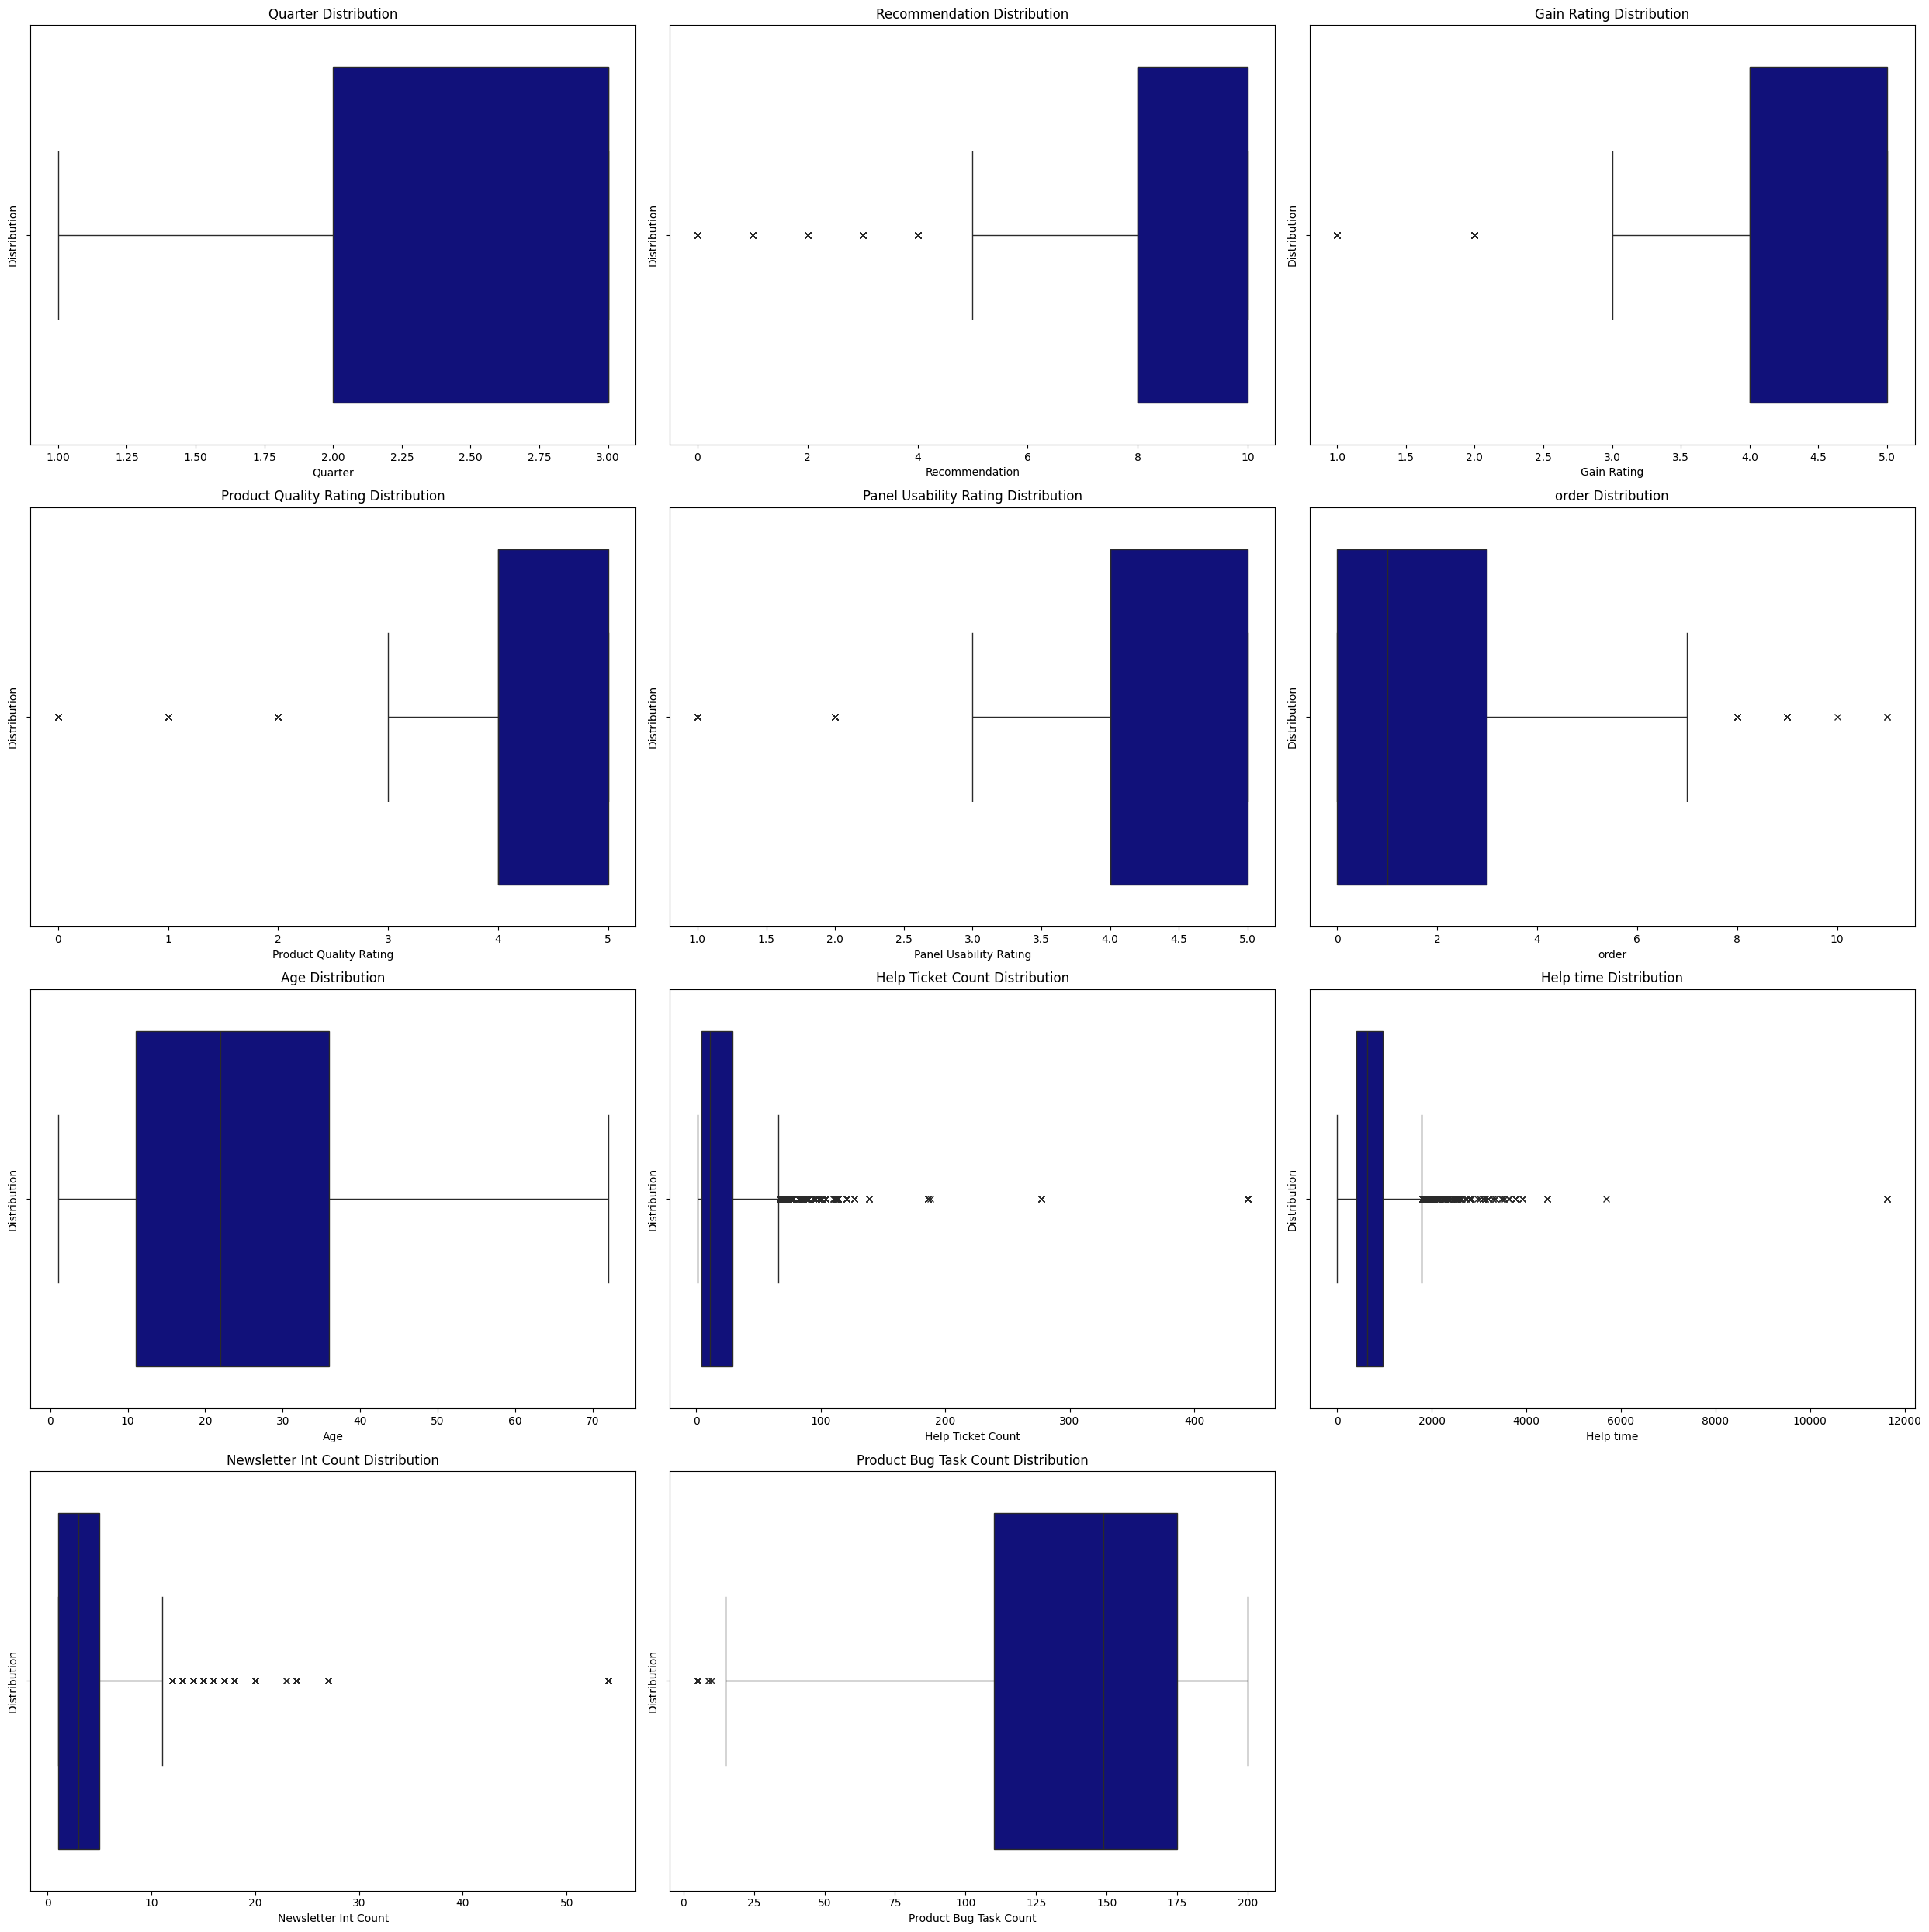

In [12]:
# Outliers boxplot
fig = plt.figure(figsize=(25, 25))
for i, col in enumerate(df_num.columns):
    ax = fig.add_subplot(4, 3, i+1)
    sns.boxplot(x = df_num[col].ffill(), 
                color='darkblue',
                flierprops={"marker": "x"})
    ax.set_title(col + " Distribution", color='k')
    plt.ylabel('Distribution')
fig.tight_layout()

In [13]:
# remove outliers with np.abs
#from scipy import stats
#df_num = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

# shape 
#df_num.shape

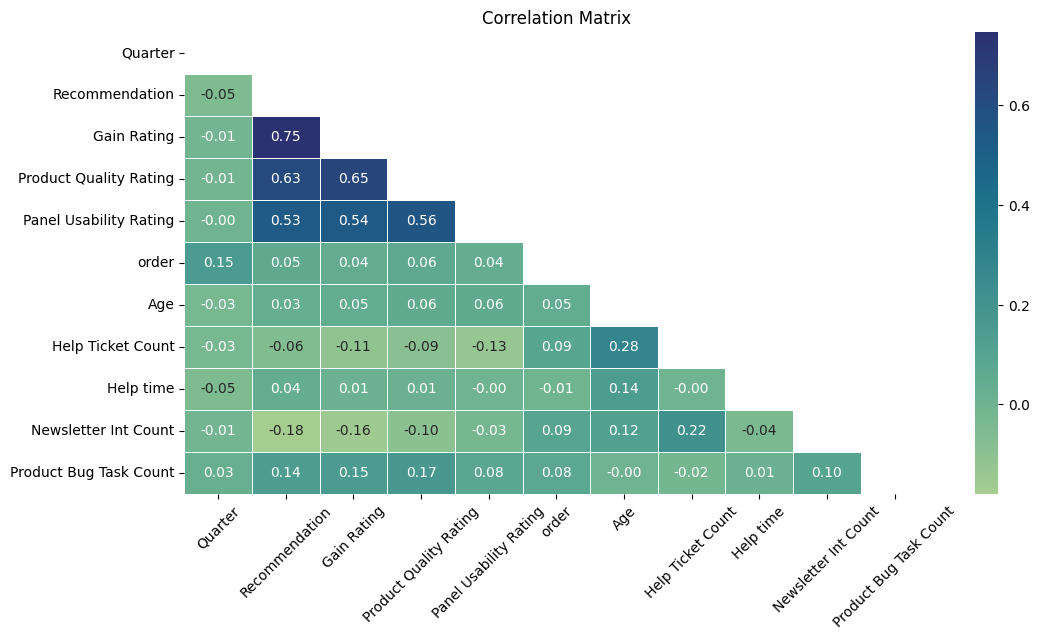

In [14]:
# correlation matrix
def sketch_corr(df):
    plt.figure(figsize=(12,6))
    mask = np.triu(df.corr(numeric_only=True))
    corr_matrix = df.corr(numeric_only=True)
    sns.heatmap(corr_matrix, 
                annot=True, 
                mask = mask, 
                cmap='crest', 
                fmt=".2f",
                linewidths=.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.show()

sketch_corr(df)


In [15]:
df.columns

Index(['Customer ID', 'Quarter', 'Survey Date', 'Response Date',
       'Recommendation', 'Gain Rating', 'Use Frequent',
       'Product Quality Rating', 'Panel Usability Rating',
       'Report Understanding', 'order', 'Age', 'MRR', 'Total Revenue',
       'Help Ticket Count', 'Help time', 'Newsletter Int Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level'],
      dtype='object')

Use Frequent
Once a Day      939
Once a Week     770
Once a Month    277
Name: count, dtype: int64


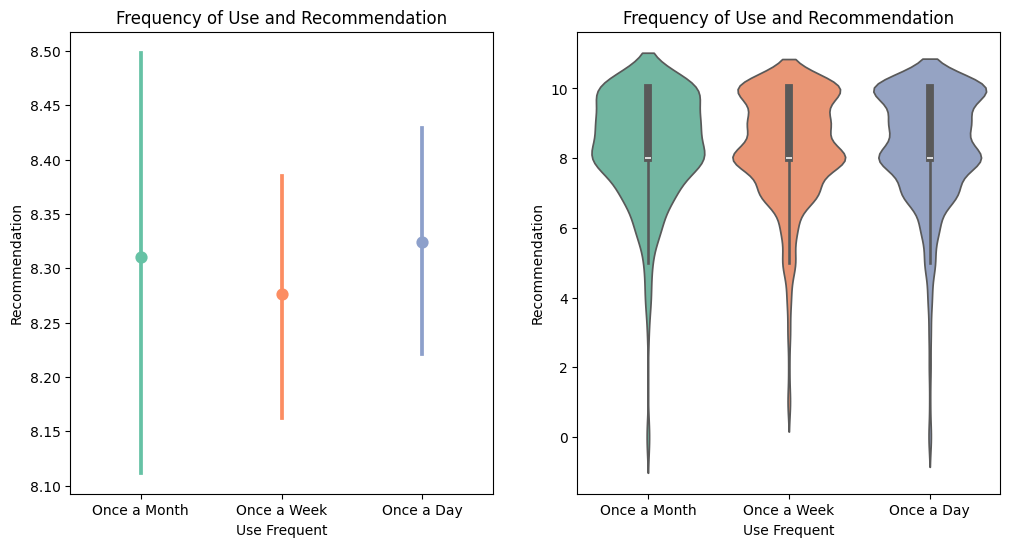

In [20]:
df['Use Frequent'].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Frequency of Use and Recommendation')
axes[1].set_title('Frequency of Use and Recommendation')

df_reco_model = df.copy()
df_reco_model = df[~df[['Use Frequent', 'Recommendation']].isna().any(axis=1)]

# Pointplot
sns.pointplot(x="Use Frequent", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[0],
            hue='Use Frequent',
            palette='Set2')

#Violinplot
sns.violinplot(x="Use Frequent", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[1],
            inner='box',
            hue='Use Frequent',
            palette='Set2')

print(df['Use Frequent'].value_counts())

plt.show()


In [21]:
df_reco_model['Report Understanding'].unique()
print(df_reco_model['Report Understanding'].value_counts())

Report Understanding
I am able to report everything easily                                       693
I need someone from Insider team to provide me the report from the panel    500
I tried but could not find everything I need                                324
I don't use it often                                                        283
I can pull all the numbers, but don't understand them                       186
Name: count, dtype: int64


/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_93939/3124084700.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reco_model["Report Understanding Num"] = df_reco_model["Report Understanding"].map(category_mapping)


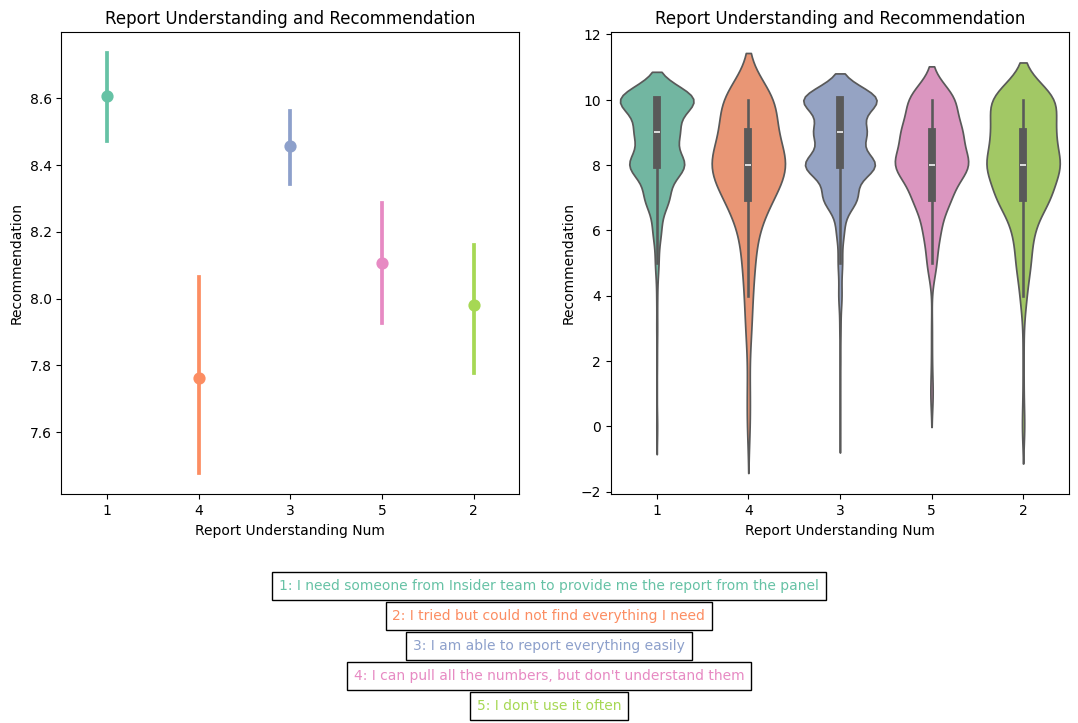

In [24]:
# Report Understanding vs Recommendation

category_mapping = {
    "I need someone from Insider team to provide me the report from the panel": "1",
    "I tried but could not find everything I need": "2",
    "I am able to report everything easily": "3",
    "I can pull all the numbers, but don't understand them": "4",
    "I don't use it often": "5"
}

df_reco_model = df[~df[['Report Understanding', 'Recommendation']].isna().any(axis=1)]
df_reco_model["Report Understanding Num"] = df_reco_model["Report Understanding"].map(category_mapping)


fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].set_title('Report Understanding and Recommendation')
axes[1].set_title('Report Understanding and Recommendation')

# Pointplot
sns.pointplot(x="Report Understanding Num", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[0],
            hue='Report Understanding Num',
            palette='Set2')

#Violinplot
sns.violinplot(x="Report Understanding Num", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[1],
            inner='box',
            hue='Report Understanding Num',
            palette='Set2')

colors = sns.color_palette("Set2", n_colors=len(category_mapping))
legend_x, legend_y = 0.5, -0.05 

for i, (desc, num) in enumerate(category_mapping.items()):
    plt.figtext(legend_x, legend_y - (i * 0.05), 
                f"{num}: {desc}", 
                ha="center", fontsize=10, 
                color=colors[i], 
                bbox={"facecolor": "white", "alpha": 1, "pad": 5})
plt.show()


In [29]:
# Clean data: remove special characters and convert to numeric
df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)
df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)
df['Help Ticket Count'] = df['Help Ticket Count'].astype(float)
df['Recommendation'] = df['Recommendation'].astype(float)
df['Age'] = df['Age'].astype(float)

# Calculate correlations
correlation_age_mrr = df['Age'].corr(df['MRR'])
correlation_age_revenue = df['Age'].corr(df['Total Revenue'])
correlation_ticket_mrr = df['Help Ticket Count'].corr(df['MRR'])
correlation_ticket_revenue = df['Help Ticket Count'].corr(df['Total Revenue'])
correlation_csat_mrr = df['Recommendation'].corr(df['MRR'])
correlation_csat_revenue = df['Recommendation'].corr(df['Total Revenue'])

# Print correlation results
print(f"Correlation between Customer Age and MRR: {correlation_age_mrr}")
print(f"Correlation between Customer Age and Total Revenue: {correlation_age_revenue}")
print(f"Correlation between Help Tickets and MRR: {correlation_ticket_mrr}")
print(f"Correlation between Help Tickets and Total Revenue: {correlation_ticket_revenue}")
print(f"Correlation between CSAT Score and MRR: {correlation_csat_mrr}")
print(f"Correlation between CSAT Score and Total Revenue: {correlation_csat_revenue}")

Correlation between Customer Age and MRR: 0.05249533590278655
Correlation between Customer Age and Total Revenue: 0.08080900865754982
Correlation between Help Tickets and MRR: 0.3590365115831347
Correlation between Help Tickets and Total Revenue: 0.16060582462130696
Correlation between CSAT Score and MRR: -0.051963849003917505
Correlation between CSAT Score and Total Revenue: 0.003801033434854818


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_93939/2407782053.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_93939/2407782053.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)


In [30]:
df.columns

Index(['Customer ID', 'Quarter', 'Survey Date', 'Response Date',
       'Recommendation', 'Gain Rating', 'Use Frequent',
       'Product Quality Rating', 'Panel Usability Rating',
       'Report Understanding', 'order', 'Age', 'MRR', 'Total Revenue',
       'Help Ticket Count', 'Help time', 'Newsletter Int Count',
       'Product Bug Task Count', 'Region', 'Vertical', 'Subvertical', 'Status',
       'Customer Level'],
      dtype='object')